| **Chapter**               | 3:  Host factors |
|---------------------------|------------------|
| **Computational Note**    | None             |
| **Figure**                | 3.2              |
| **Package prerequisites** | None             |


# Risk-stratified SIR model


\begin{equation}
    \frac{dS}{dt}   =    - \beta_{H,H} S_H I_H - \beta_{H,L} S_H I_L - \beta_{L,H} S_L I_H - \beta_{L,L} S_L I_L
\end{equation}

\begin{equation}
    \frac{dI_H}{dt} =    \beta_{L,H} S_H I_H + \beta_{L,L} S_H I_L - \gamma I_H
\end{equation}

\begin{equation}
    \frac{dI_L}{dt} =    \beta_{L,H} S_L I_H + \beta_{L,L} S_L I_L - \gamma I_L
\end{equation}

\begin{equation}
    \frac{dR}{dt}   =    \gamma(I_H + I_L)
\end{equation}

\begin{equation}
    \mathbf{b} = \begin{pmatrix}
        10 & 1 \\
        1 & 3
    \end{pmatrix}    
\end{equation}

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}


## Set initial value parameters

In [2]:
I_0 = 1e-5
S_0 = 1 - I_0
R_0 = 0

S_L_0 = S_0 * 0.8
S_H_0 = S_0 * 0.2
I_L_0 = I_0 * 0.8
I_H_0 = I_0 * 0.2

y_0 = (S_H_0, S_L_0, I_H_0, I_L_0, R_0)

gamma = 0.05

beta = [10, 0.5, 0.5, 2]

## Defining the system of ODEs as a function

In [3]:
def deriv(t, y, beta, gamma):
    SH, SL, IH, IL, R = y
    
    dSHdt = -beta[0] * SH * IH - beta[1] * SH * IL
    dSLdt = -beta[2] * SL * IH - beta[3] * SL * IL

    dIHdt = beta[0] * SH * IH - beta[1] * SH * IL - gamma * IH
    dILdt = beta[2] * SL * IH - beta[3] * SL * IL - gamma * IL
    
    dRdt = gamma * (IH + IL)

    return dSHdt, dSLdt, dIHdt, dILdt, dRdt

## Solve the IVP

In [4]:
res = solve_ivp(fun=deriv, t_span = (0, 60), y0=y_0, args=(beta, gamma), max_step=0.25)

## Plot results

/var/folders/1d/97x3559931s0_6hkz64q4zth0000gn/T/ipykernel_87977/1718128824.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


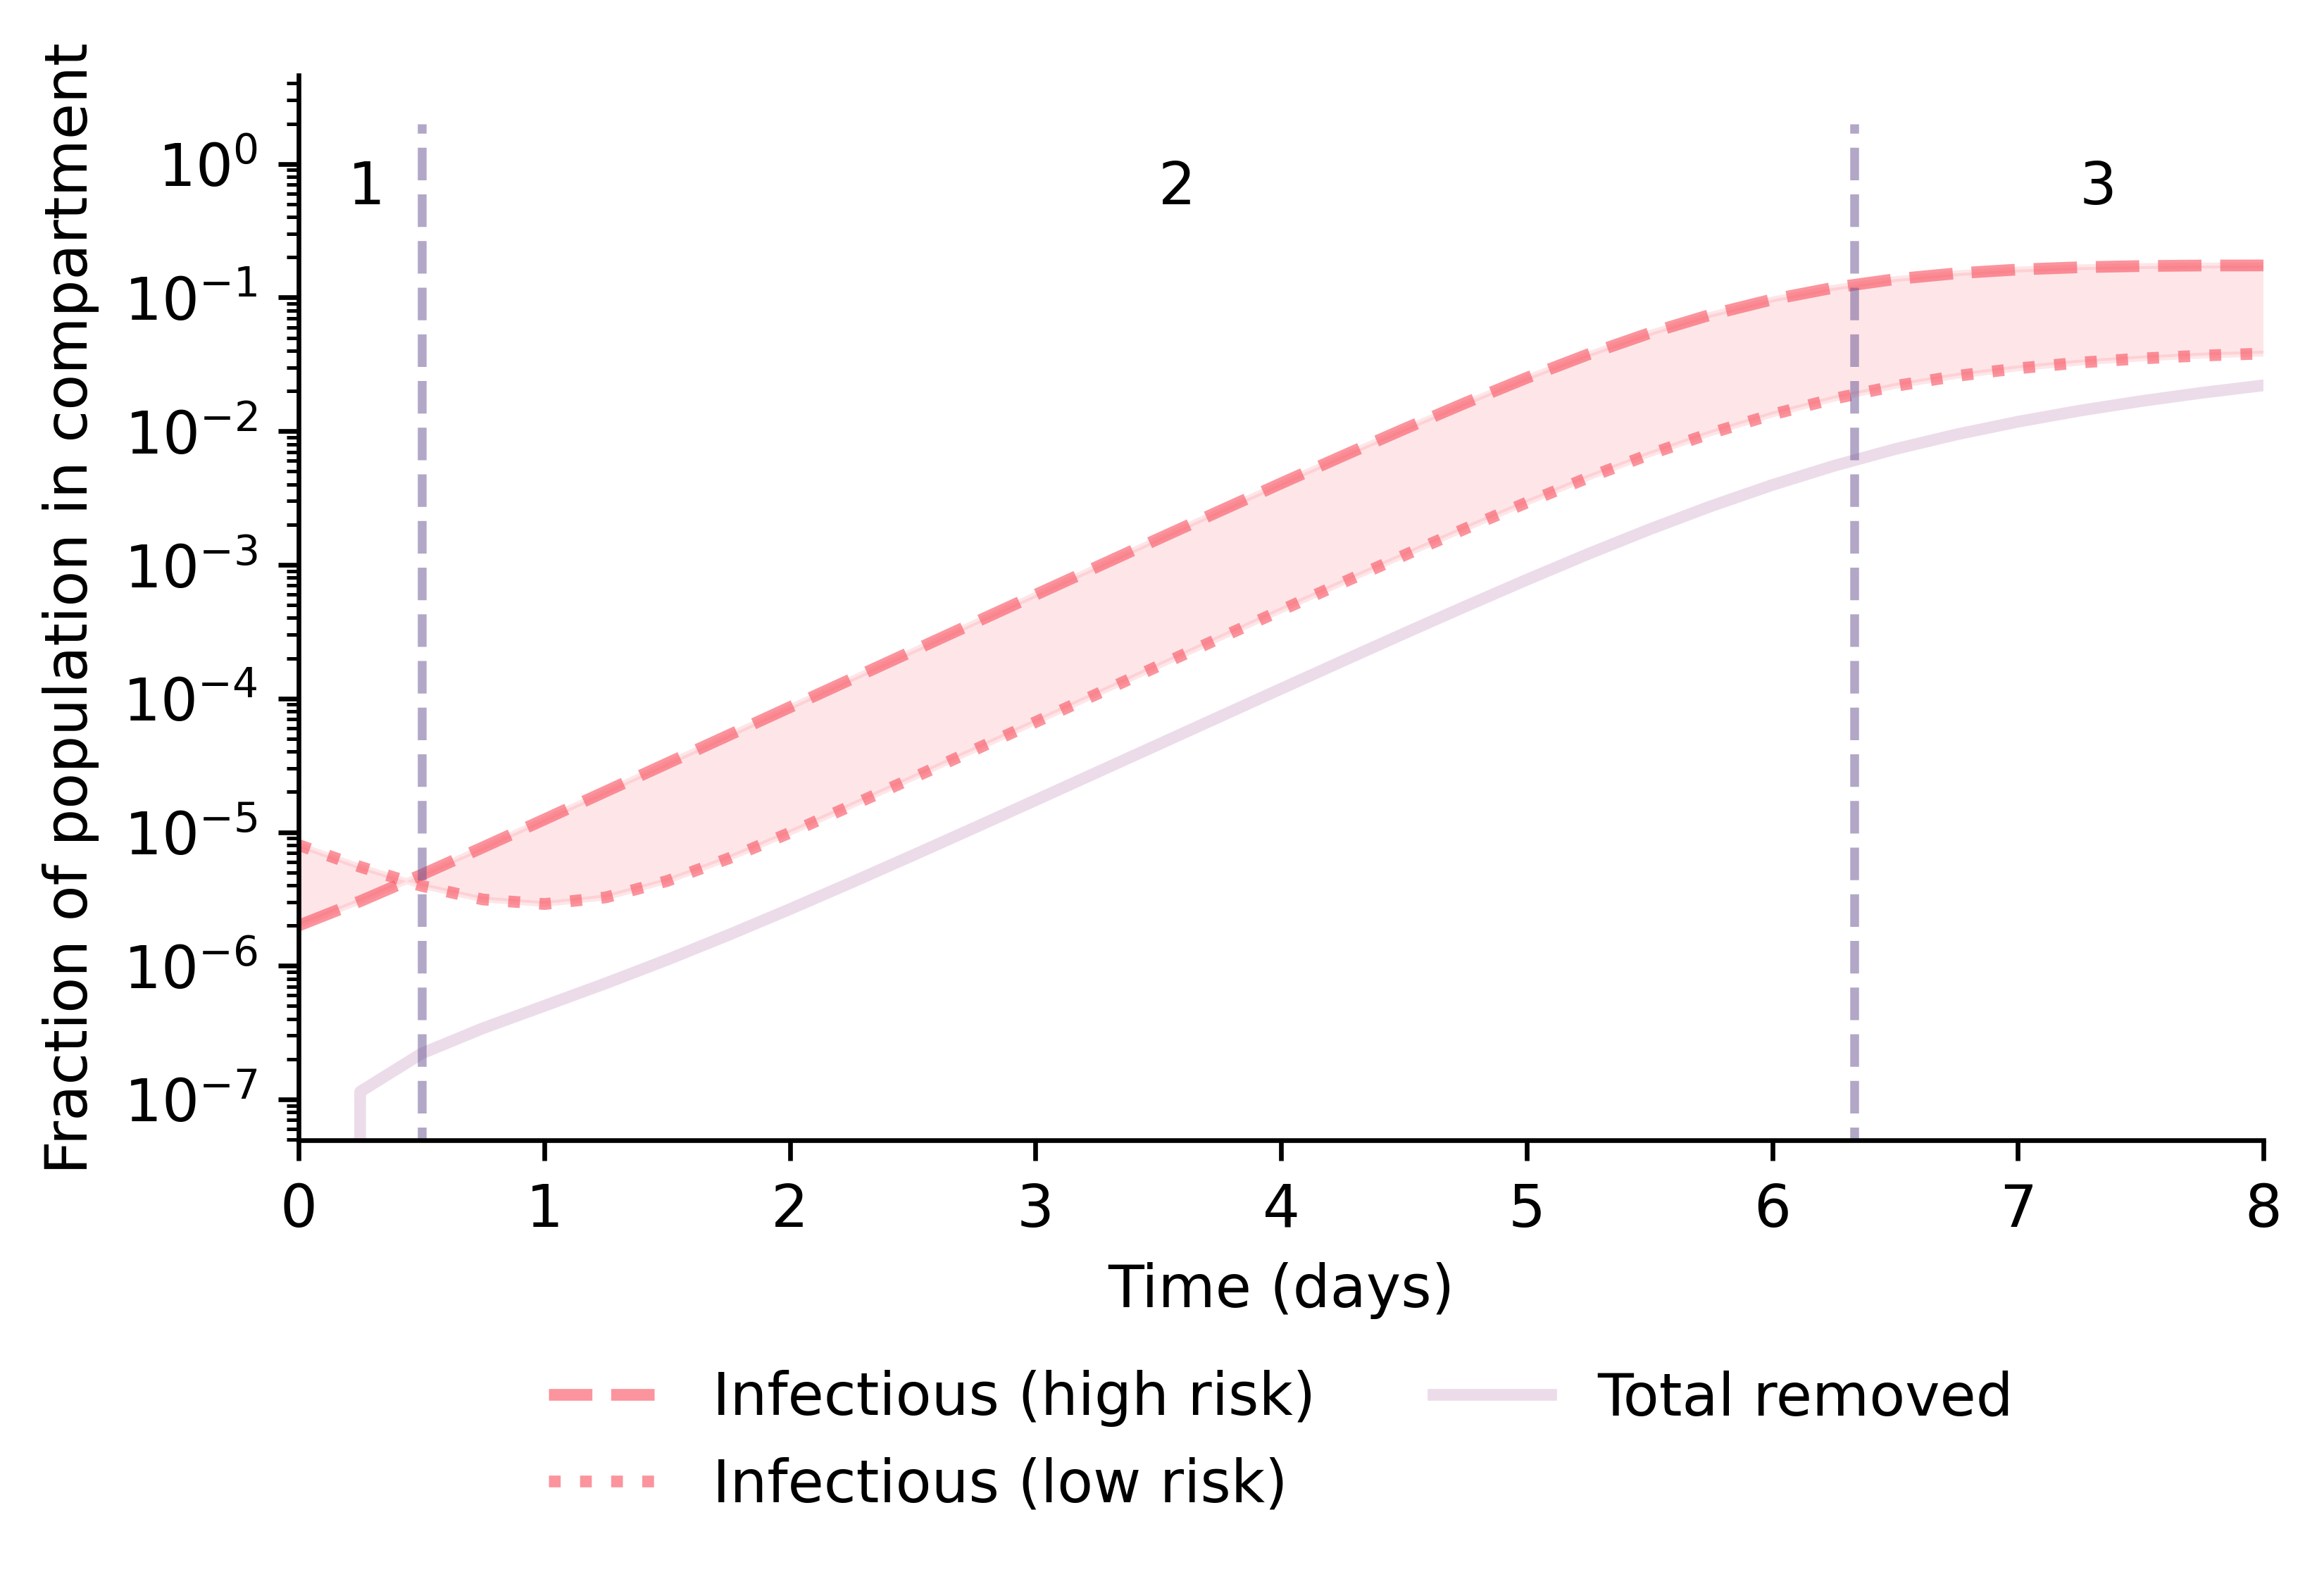

In [7]:
SH, SL, IH, IL, R = res.y

fig = plt.figure(facecolor="w", figsize=(6,4), dpi=600)
ax = fig.add_subplot(111, axisbelow=True)

#ax.plot(res.t, SH, color=COLORS["S"], alpha=0.66, lw=2, label="Susceptible (low risk)", linestyle="dashed")
#ax.plot(res.t, SL, color=COLORS["S"], alpha=0.66, lw=2, label="Susceptible (high risk)", linestyle="dotted")


#ax.plot(res.t, SH, color=COLORS["S"], alpha=0.66, lw=2, label="Susceptible (low risk)", linestyle="dashed")
#ax.plot(res.t, SL, color=COLORS["S"], alpha=0.66, lw=2, label="Susceptible (high risk)", linestyle="dotted")

ax.plot(res.t, IH, color=COLORS["I"], alpha=0.66, lw=2, label="Infectious (high risk)", linestyle="dashed")
ax.plot(res.t, IL, color=COLORS["I"], alpha=0.66, lw=2, label="Infectious (low risk)", linestyle="dotted")
ax.fill_between(res.t, IH, IL, color=COLORS["I"], alpha=0.15)


ax.plot(res.t, R, color=COLORS["R"], alpha = 0.2, lw=2, label="Total removed")

# ax.fill_between(res.t, 0, S, color=COLORS["S"], alpha=0.15)
# ax.fill_between(res.t, 0, I, color=COLORS["I"], alpha=0.15)
# ax.fill_between(res.t, D, R + D, color=COLORS["R"], alpha=0.15, label="Recovered")
# ax.fill_between(res.t, 0, D, color=COLORS["D"], alpha=0.15, label="Deceased")

ax.set_xlabel("Time (days)")
ax.set_ylabel("Fraction of population in compartment")
ax.set_xlim(0, 8)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend(title='', bbox_to_anchor=(0.5, -0.4), loc="lower center", ncol=2, frameon=False)

fig.subplots_adjust(bottom=0.25)

ax.vlines([0.5, 6.3333], ymin=0, ymax=2, color=COLORS["X"], alpha=0.5, linestyle="dashed")

ax.text(0.2, 5e-1, "1")
ax.text(3.5, 5e-1, "2")
ax.text(7.25, 5e-1, "3")


ax.set_yscale("log")

plt.savefig("sir_two_class_integral.pdf")
plt.show()